## 导入库

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

## 读取数据并计算GGDP值

In [36]:
# 定义文件夹路径
folder_path = './Papers/1/Data'
folder_path = os.path.abspath(folder_path)
files = os.listdir(folder_path)
excel_extensions = ('.xlsx', '.xls')
dataframes = {}

# 定义高精度数据类型
dtype = np.float64  # 使用float64确保高精度

# 遍历文件夹中的文件
print(files)
for file_name in files:
    # 检查文件是否为Excel文件
    if file_name.lower().endswith(excel_extensions):
        file_path = os.path.join(folder_path, file_name)
        df_name = file_name[0:-5]  # 去除文件扩展名作为DataFrame的名称
        try:
            # 读取Excel文件的第一张表
            # 第一列作为索引（假设第一列是非数值类型）
            df = pd.read_excel(file_path, sheet_name=0, index_col=0)

            # 将除第一列外的其他列转换为float64
            # 使用astype将数值列转换为float64
            for col in df.columns:
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype)
            df=df.drop(df.columns[0],axis=1)
            dataframes[df_name] = df

            # 获取行数和列数
            num_rows, num_cols = df.shape
            print(f"Folder: {folder_path}")
            print(f"File: {file_name}")
            print(f"Rows: {num_rows}")
            print(f"Columns: {num_cols}")
            print("-" * 40+"\n")

        except Exception as e:
            # 处理无法读取的文件
            print(f"Error reading file {file_name}: {e}")
            print("-" * 40+"\n")

# 打印加载的DataFrame名称
print("加载的 DataFrame 名称：", list(dataframes.keys()))

# 确保所有DataFrame的索引一致
index = dataframes['CDM'].index
for df in dataframes:
    dataframes[df].index = index

# 计算GGDP，确保使用高精度数据类型
GGDP = (dataframes["GDP"].astype(dtype) -(dataframes["CO2"].astype(dtype) * dataframes["EnergyAverage"].astype(dtype)) -(dataframes["Waste"].astype(dtype) * 74 * dataframes["EnergyPrice"].astype(dtype)) -(dataframes["GNI"].astype(dtype) / 100 * dataframes["NRD"].astype(dtype)))
GDP=dataframes["GDP"]
# 打印计算结果
GGDP.to_excel('GGDP.xlsx', index=True)

['2.png', 'CDM.xlsx', 'CO2.xlsx', 'EnergyAverage.xlsx', 'EnergyPrice.xlsx', 'GDP.xlsx', 'GGDP.xlsx', 'GNI.xlsx', 'KWH.xlsx', 'NRD.xlsx', 'Waste.xlsx']
Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: CDM.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: CO2.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: EnergyAverage.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: EnergyPrice.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: GDP.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: GGDP.xlsx
Rows: 160
Columns: 50
----------------------------------------

Folder: D:\PycharmProject\GreenGDP\Papers\1\Data
File: GNI.xls

## 对GDP和GGDP的目前结果进行呈现

Rows: 160
Columns: 50
----------------------------------------

图像已保存为 GGDP 1970-2019.png


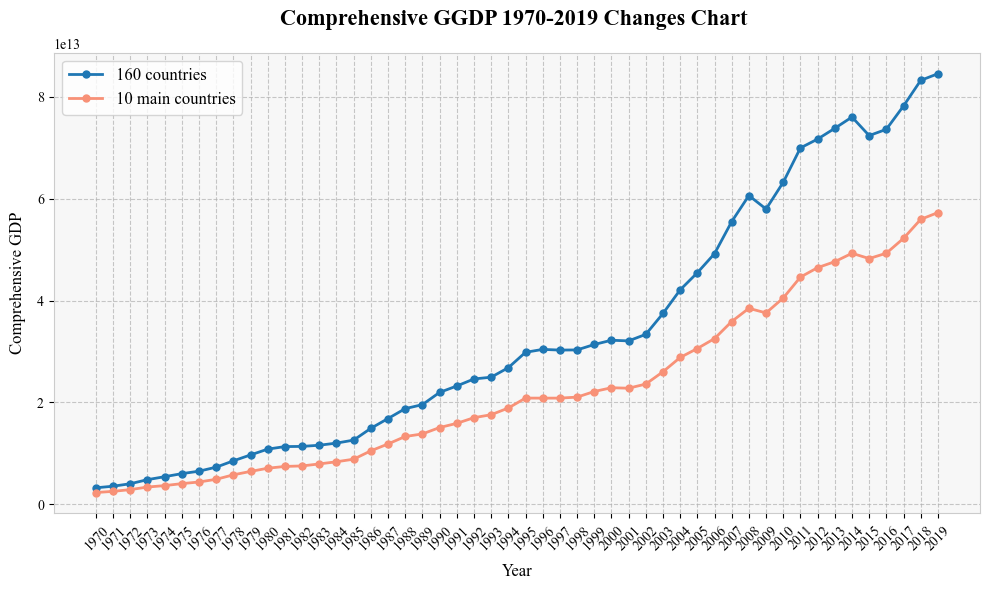

Rows: 160
Columns: 50
----------------------------------------

图像已保存为 GDP 1970-2019.png


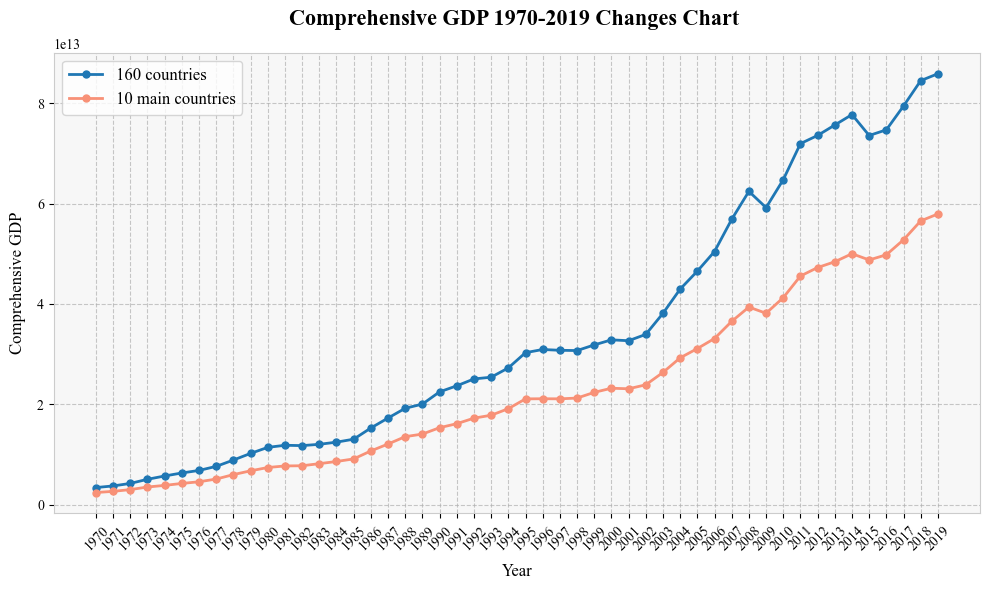

In [46]:
#绘制GGDP和GDP1970-2019图像
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']


def plot(Source,name):
    Source1 = Source.loc[["China", "Canada", "Australia", "United States", "United Kingdom", "Germany", "France", "Japan",
                      "Russian Federation", "India"]]
    # 获取行数和列数
    num_rows, num_cols = Source.shape
    print(f"Rows: {num_rows}")
    print(f"Columns: {num_cols}")
    print("-" * 40+"\n")
    columns_sum=np.sum(Source,axis=0)
    columns_sum1=np.sum(Source1,axis=0)
    columns_sum.to_excel('./Source/'+name+' 160sum.xlsx', index=True)
    columns_sum1.to_excel('./Source/'+name+' 10sum.xlsx', index=True)
    # 美化折线图
    plt.figure(figsize=(10, 6))  # 设置图像大小
    plt.plot(columns_sum, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=5, label='160 countries')  # 绘制折线图
    plt.plot(columns_sum1, marker='o', linestyle='-', color='#f89177', linewidth=2, markersize=5, label='10 main countries')
    plt.title('Comprehensive '+name+' Changes Chart ', fontsize=16, fontweight='bold', pad=20)  # 设置标题
    plt.xlabel('Year', fontsize=12, labelpad=8)  # 设置x轴标签
    plt.ylabel('Comprehensive GDP', fontsize=12, labelpad=8)  # 设置y轴标签
    plt.xticks(ticks=range(len(columns_sum)), labels=columns_sum.index, rotation=45, fontsize=10)  # 设置x轴刻度和标签
    plt.yticks(fontsize=10)  # 设置y轴刻度字体大小
    plt.grid(True, linestyle='--', alpha=0.7)  # 显示网格，设置虚线样式和透明度
    plt.legend(fontsize=12, loc='upper left')  # 显示图例，设置字体大小和位置

    # 美化背景和边框
    ax = plt.gca()  # 获取当前轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色
    #ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    #ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['left'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['right'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['top'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['bottom'].set_color('#cccccc')  # 设置底部边框颜色

    # 调整布局
    plt.tight_layout()
    name=name+'.png'
    # 保存图像
    plt.savefig('./Output/'+name, dpi=300, bbox_inches='tight')  # 保存为PNG文件，设置分辨率和边界
    print("图像已保存为 "+name)
    # 显示图像
    plt.show()

plot(dataframes['GGDP'],'GGDP 1970-2019')
plot(dataframes['GDP'],'GDP 1970-2019')

In [38]:
#计算GGDP和GDP差值
GGDPSum=pd.read_excel("./Source/GGDP 1970-2019 160sum.xlsx", sheet_name=0, index_col=0)
GDPSum=pd.read_excel("./Source/GDP 1970-2019 160sum.xlsx", sheet_name=0, index_col=0)
Diff=(GDPSum-GGDPSum)/GDPSum*100
Diff


,0
1970,5.471893
1971,5.298992
1972,5.004456
1973,4.626176
1974,5.449966
1975,4.919944
1976,4.935458
1977,4.658484
1978,4.131649
1979,5.225201


In [44]:
Diff1=(GDP-GGDP)/GDP*100
Diff1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.738116,0.850313,1.061029,1.635254,1.810791,2.470804,2.861739,2.526449,1.935793,2.622087,...,0.406942,0.480531,0.493249,0.415059,0.414499,0.422042,0.500742,0.509466,0.479491,0.484466
Albania,9.651171,9.515444,8.810321,8.884447,9.420903,9.719071,10.287448,10.467219,11.426714,12.474808,...,1.738154,2.568275,2.875515,3.063728,3.165562,7.681512,1.208452,1.477807,1.290651,1.262993
Algeria,6.096671,4.939482,7.155267,8.234053,17.560035,15.766250,17.989629,16.194086,14.090482,26.295032,...,17.638075,17.563452,18.908256,18.471190,15.887036,12.082783,8.572567,9.008985,8.131068,7.879866
Angola,8.084210,8.394824,7.905603,8.380428,8.995817,8.957703,9.282224,9.114421,9.115674,9.554527,...,30.809608,25.031319,24.775023,23.438346,18.300949,9.723861,9.545836,10.945686,9.808459,10.679429
Argentina,0.350987,0.458803,0.492727,0.410965,1.228970,2.273259,2.324743,1.709544,1.898199,4.256336,...,2.507952,2.653250,2.785813,2.688352,2.425434,0.959752,0.837951,0.937057,0.980515,1.126021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",6.444489,7.382308,7.079158,9.997659,24.205845,19.196092,17.994151,11.743496,11.312382,24.372641,...,1.057209,2.591178,1.724980,1.608418,0.839690,0.794294,0.684123,0.671568,0.677970,0.694037
Vietnam,4.057539,3.982206,3.936744,3.902234,3.607646,3.434219,3.581635,3.830594,3.495392,3.534845,...,3.528243,3.883760,3.469909,2.759696,2.380104,1.356693,0.965234,0.973766,0.994540,1.021830
"Yemen, Rep.",4.529425,4.608121,4.822502,5.340504,5.500712,5.713100,6.091998,6.495731,6.405696,6.937123,...,12.386104,10.536940,7.127345,8.253766,5.345408,0.139765,0.044356,0.256343,0.257338,0.274917


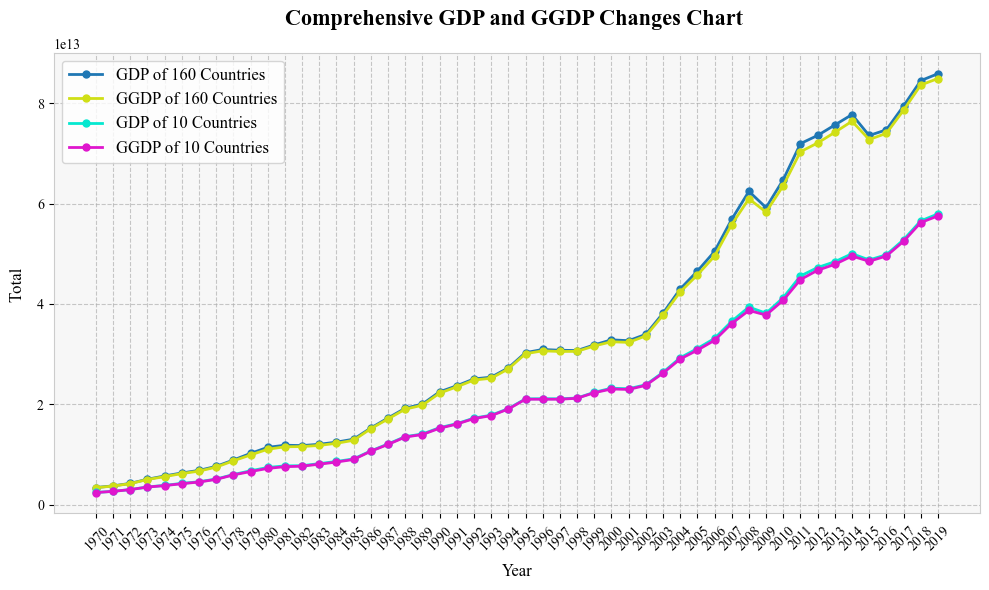

In [54]:
## GDP和GGDP直接对比图
def plot1(Source,Source1,Source2,Source3,name):
    
    columns_sum=np.sum(Source,axis=0)
    columns_sum1=np.sum(Source1,axis=0)
    columns_sum2=np.sum(Source2,axis=0)
    columns_sum3=np.sum(Source3,axis=0)
    # 美化折线图
    plt.figure(figsize=(10, 6))  # 设置图像大小
    plt.plot(columns_sum, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=5, label='GDP of 160 Countries')  # 绘制折线图
    plt.plot(columns_sum1, marker='o', linestyle='-', color='#d0df16', linewidth=2, markersize=5, label='GGDP of 160 Countries')
    plt.plot(columns_sum2, marker='o', linestyle='-', color='#05e8d0', linewidth=2, markersize=5, label='GDP of 10 Countries')  # 绘制折线图
    plt.plot(columns_sum3, marker='o', linestyle='-', color='#df16cd', linewidth=2, markersize=5, label='GGDP of 10 Countries')
    plt.title('Comprehensive '+name+' Changes Chart ', fontsize=16, fontweight='bold', pad=20)  # 设置标题
    plt.xlabel('Year', fontsize=12, labelpad=8)  # 设置x轴标签
    plt.ylabel('Total ', fontsize=12, labelpad=8)  # 设置y轴标签
    plt.xticks(ticks=range(len(columns_sum)), labels=columns_sum.index, rotation=45, fontsize=10)  # 设置x轴刻度和标签
    plt.yticks(fontsize=10)  # 设置y轴刻度字体大小
    plt.grid(True, linestyle='--', alpha=0.7)  # 显示网格，设置虚线样式和透明度
    plt.legend(fontsize=12, loc='upper left')  # 显示图例，设置字体大小和位置

    # 美化背景和边框
    ax = plt.gca()  # 获取当前轴
    ax.set_facecolor('#f7f7f7')  # 设置背景颜色
    #ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    #ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['left'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['right'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['top'].set_color('#cccccc')  # 设置左侧边框颜色
    ax.spines['bottom'].set_color('#cccccc')  # 设置底部边框颜色

    # 调整布局
    plt.tight_layout()
    plt.savefig('./Output/'+name, dpi=300, bbox_inches='tight')  # 保存为PNG文件，设置分辨率和边界
    name=name+'.png'
    # 显示图像
    plt.show()
plot1(GDP,GGDP,GDP.loc[["China", "Canada", "Australia", "United States", "United Kingdom", "Germany", "France", "Japan", "Russian Federation", "India"]], GGDP.loc[["China", "Canada", "Australia", "United States", "United Kingdom", "Germany", "France", "Japan","Russian Federation", "India"]],'GDP and GGDP')